In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, load_digits, make_moons
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
import os.path

In [9]:
X,y=make_blobs(n_samples=150,n_features=2,centers=5,cluster_std=[0.8,2,3,3,1.5])
k=5
kmeans=KMeans(n_clusters=k)
y_pred=kmeans.fit_predict(X)

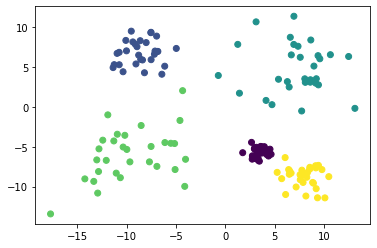

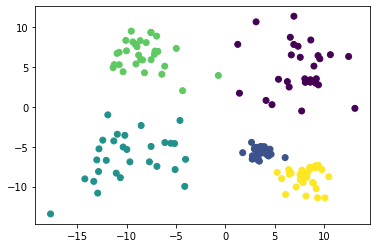

In [12]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y_pred)

In [13]:
print(y_pred is kmeans.labels_)
print(kmeans.cluster_centers_)

True
[[ 7.47910055  4.83087922]
 [ 3.49648284 -5.76097177]
 [-9.74532584 -6.26128698]
 [-8.19687311  6.58896749]
 [ 8.04044251 -8.88711899]]


In [14]:
kmeans.transform(X[:5])

array([[12.74073825,  3.60605992, 16.24905475, 20.56034489,  1.91165044],
       [11.02251351,  0.73750349, 12.76886789, 16.27008603,  6.24047626],
       [12.32408578,  6.14947363, 19.21622081, 22.47208978,  2.08968401],
       [10.5992543 ,  0.75338274, 13.74909505, 16.91155774,  5.52146214],
       [14.47344422, 16.41117081, 13.57009152,  1.42321906, 21.75659401]])

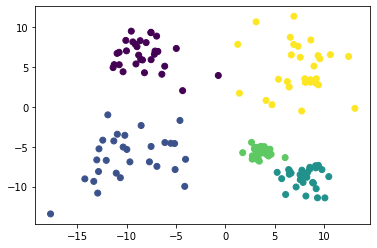

In [15]:
good_init=np.array([[-9,8],[-9,-7],[8,-10],[3.5,-5],[8,5]])
kmeans=KMeans(n_clusters=k,init=good_init,n_init=1)
y_pred=kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

In [16]:
print(kmeans.inertia_)
print(kmeans.score(X))

1434.5791606289451
-1434.579160628945


C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  f"MiniBatchKMeans is known to have a memory leak on "


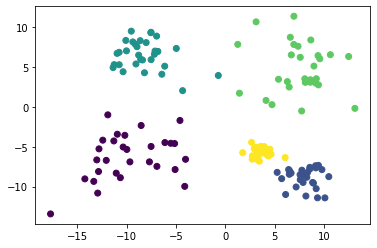

In [20]:
minibatch_kmeans=MiniBatchKMeans(n_clusters=5)
y_pred=minibatch_kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

Text(0.5, 0, 'k')

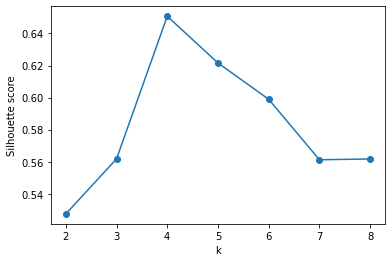

In [24]:
sht_scores=[]
for k in range(2,9):
    kmeans=KMeans(n_clusters=k).fit(X)
    sht_scores.append(silhouette_score(X,kmeans.labels_))
plt.plot(range(2,9),sht_scores)
plt.scatter(range(2,9),sht_scores)
plt.ylabel("Silhouette score")
plt.xlabel("k")

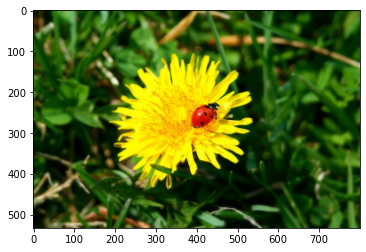

In [4]:
from matplotlib.image import imread
image=imread(os.path.join("images","unsupervised_learning","ladybug.png"))
image.shape
plt.imshow(image)

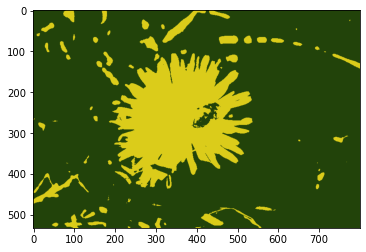

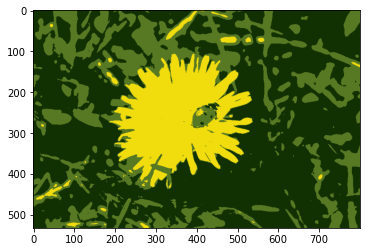

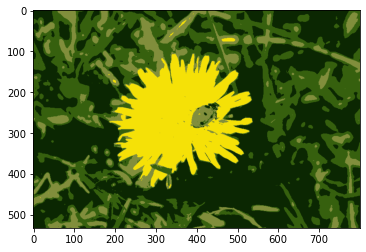

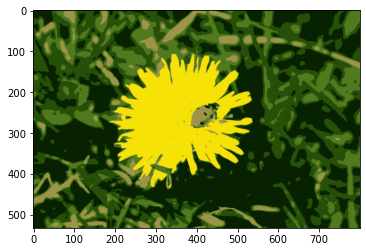

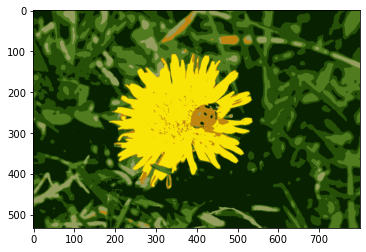

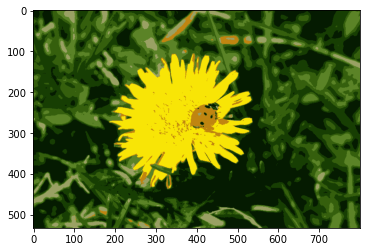

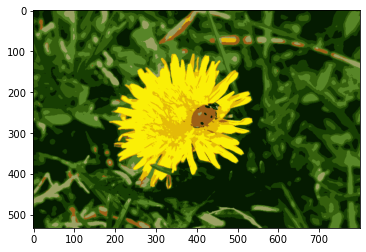

In [6]:
X=image.reshape(-1,3)
for n in range(2,9):
    kmeans=KMeans(n_clusters=n).fit(X)
    segmented_img=kmeans.cluster_centers_[kmeans.labels_]
    segmented_img=segmented_img.reshape(image.shape)
    plt.figure()
    plt.imshow(segmented_img)

In [9]:
X_digits,y_digits=load_digits(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X_digits,y_digits,random_state=42)

log_reg=LogisticRegression(max_iter=10000)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9733333333333334

In [14]:
pipeline=Pipeline([
    ("kmeans",KMeans(n_clusters=100)),
    ("log_reg",LogisticRegression(max_iter=50000))
])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.9777777777777777

In [16]:
param_grid={"kmeans__n_clusters":list(range(2,100))}
grid_clf=GridSearchCV(pipeline,param_grid,cv=3,verbose=2,n_jobs=-1)
grid_clf.fit(X_train,y_train)
print(grid_clf.best_params_)
print(grid_clf.score(X_train,y_train))

Fitting 3 folds for each of 98 candidates, totalling 294 fits
{'kmeans__n_clusters': 71}
1.0


In [18]:
n_labeled=50
log_reg=LogisticRegression(max_iter=10000)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])
log_reg.score(X_test,y_test)

0.8222222222222222

In [19]:
k=50
kmeans=KMeans(n_clusters=k)
X_digits_dist=kmeans.fit_transform(X_train)
representative_digit_idx=np.argmin(X_digits_dist,axis=0)
X_representative_digits=X_train[representative_digit_idx]

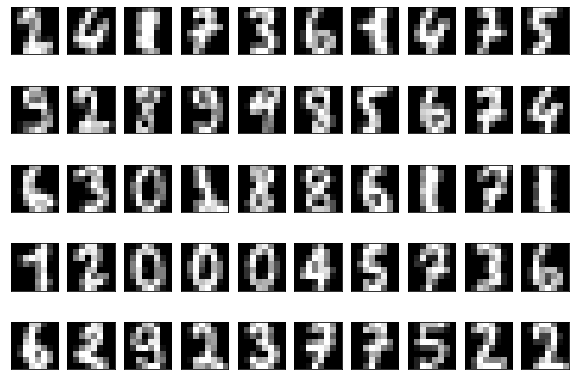

In [27]:
fig,axes=plt.subplots(5,10,figsize=(10,7))
for ax, i in zip(axes.ravel(),range(50)):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(X_representative_digits[i].reshape(8,8),cmap="gray")
    

In [33]:
y_representative_digits

array([2, 4, 1, 7, 3, 6, 1, 4, 7, 5, 9, 2, 8, 9, 9, 8, 5, 6, 7, 4, 6, 3,
       0, 1, 8, 8, 6, 1, 7, 1, 1, 2, 0, 0, 0, 4, 5, 7, 3, 6, 6, 2, 9, 2,
       3, 7, 7, 5, 2, 2])

In [30]:
y_representative_digits=y_train[representative_digit_idx]
log_reg=LogisticRegression(max_iter=10000)
log_reg.fit(X_representative_digits,y_representative_digits)
log_reg.score(X_test,y_test)

0.9111111111111111

In [32]:
y_train_propagated=np.empty(len(X_train),dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

log_reg=LogisticRegression(max_iter=10000)
log_reg.fit(X_train,y_train_propagated)
log_reg.score(X_test,y_test)

0.9066666666666666

In [34]:
percentile_closest=20

X_cluster_dist=X_digits_dist[np.arange(len(X_train)),kmeans.labels_]
for i in range(k):
    in_cluster=(kmeans.labels_==i)
    cluster_dist=X_cluster_dist[in_cluster]
    cutoff_distance=np.percentile(cluster_dist,percentile_closest)
    above_cutoff=(X_cluster_dist>cutoff_distance)
    X_cluster_dist[in_cluster&above_cutoff]=-1
    
partially_propagated=(X_cluster_dist!=-1)
X_train_partially_propagated=X_train[partially_propagated]
y_train_partially_propagated=y_train_propagated[partially_propagated]

In [36]:
log_reg=LogisticRegression(max_iter=10000)
log_reg.fit(X_train_partially_propagated,y_train_partially_propagated)
log_reg.score(X_test,y_test)

0.9311111111111111

In [37]:
np.mean(y_train_partially_propagated==y_train[partially_propagated])

0.9896193771626297

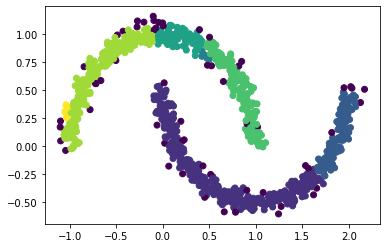

In [40]:
X,y=make_moons(n_samples=1000,noise=0.05)
dbscan=DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

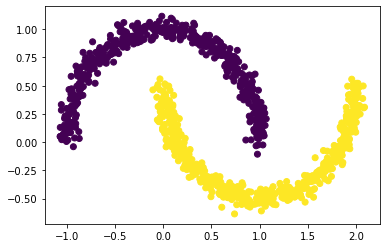

In [41]:
X,y=make_moons(n_samples=1000,noise=0.05)
dbscan=DBSCAN(eps=0.2,min_samples=5)
dbscan.fit(X)
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

X_new=np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print(knn.predict(X_new))
print(knn.predict_proba(X_new))

[0 1 0 1]
[[0.8  0.2 ]
 [0.   1.  ]
 [0.78 0.22]
 [0.   1.  ]]


In [44]:
y_dist,y_pred_idx=knn.kneighbors(X_new,n_neighbors=1)
y_pred=dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist>0.2]=-1
y_pred.ravel()

array([-1,  1,  0, -1], dtype=int64)

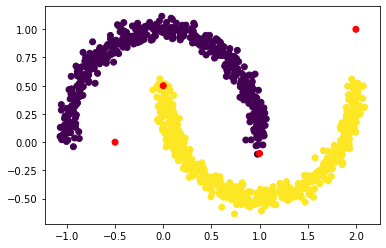

In [50]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)
plt.scatter(X_new[:,0],X_new[:,1],c=np.repeat("red",len(X_new)))

In [2]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [3]:
gm=GaussianMixture(n_components=3,n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [4]:
print(gm.converged_)
print(gm.n_iter_)
print(gm.weights_)
print(gm.means_)
print(gm.covariances_)

True
4
[0.40004337 0.20954915 0.39040749]
[[-1.40765148  1.42718339]
 [ 3.40011393  1.05931676]
 [ 0.0516183   0.07550754]]
[[[ 0.63477114  0.72969538]
  [ 0.72969538  1.16085164]]

 [[ 1.14631283 -0.03285453]
  [-0.03285453  0.95505142]]

 [[ 0.68856426  0.79633822]
  [ 0.79633822  1.21252023]]]


In [5]:
gm.predict_proba(X)

array([[6.73632768e-07, 2.30956994e-02, 9.76903627e-01],
       [6.72738827e-04, 1.63176388e-02, 9.83009622e-01],
       [9.99922105e-01, 1.96800317e-06, 7.59268139e-05],
       ...,
       [2.09167854e-26, 9.99999561e-01, 4.38851876e-07],
       [1.41536116e-41, 1.00000000e+00, 5.40181989e-16],
       [7.72772760e-41, 1.00000000e+00, 2.38611270e-15]])

In [6]:
X_new,y_new=gm.sample(6)
print(X_new)
print(y_new)
gm.score_samples(X_new)

[[ 4.39208265  0.95977467]
 [ 3.57208395  1.43232448]
 [ 3.57725585  1.16541748]
 [ 4.49705094  2.29073517]
 [-0.09206456  0.93003139]
 [ 0.29687177  0.48242775]]
[1 1 1 1 2 2]


array([-3.87731412, -3.53321358, -3.4656256 , -4.80606305, -3.76775504,
       -2.04239455])

In [4]:
densities=gm.score_samples(X)
density_threshold=np.percentile(densities,4)
anomalies=X[densities<density_threshold]

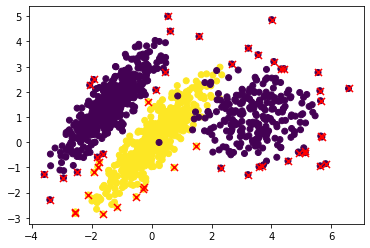

In [13]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(anomalies[:,0],anomalies[:,1],c="red",marker="x",s=50)

In [14]:
print(gm.bic(X))
print(gm.aic(X))

8189.733705221635
8102.508425106597


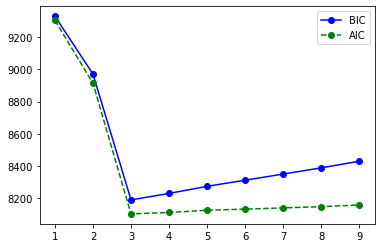

In [18]:
bics=[]
aics=[]
for k in range(1,10):
    gm=GaussianMixture(n_components=k,n_init=10)
    gm.fit(X)
    bics.append(gm.bic(X))
    aics.append(gm.aic(X))
plt.plot(range(1,10),bics,"b-",marker="o",label="BIC")
plt.plot(range(1,10),aics,"g--",marker="o",label="AIC")
plt.legend()

In [20]:
bgm=BayesianGaussianMixture(n_components=10,n_init=10)
bgm.fit(X)
np.round(bgm.weights_,2)

array([0.4 , 0.2 , 0.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])